In [25]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

In [2]:
file = h5py.File("/home/jakob/PycharmProjects/NetOGlycThesis/data/nsp2/training_data/TrainValidate_HHblits_embeddings.h5",'r')

In [16]:
ss8_counts = [0 for _ in range(8)]
for idx in range(file['identifiers'].shape[0]):
    seq_length = len(file['sequences'].asstr()[idx])
    unique, counts = np.unique(file['labels']['ss8'][idx, :seq_length], return_counts=True)
    for value, count in zip(unique, counts):
        ss8_counts[int(value)] += int(count)

ss8_counts = [100539, 891562, 14222, 26535, 563839, 211031, 284239, 686471]
ss8_weights = [sum(ss8_counts)/(len(ss8_counts) * count) for count in ss8_counts]
print(ss8_weights)

[3.4544281323665444, 0.38954638039754946, 24.420246800731263, 13.08855285472018, 0.6159643976383329, 1.645752282839962, 1.2218757805930924, 0.5059277813629418]


In [17]:
ss3_counts = [0 for _ in range(3)]
ss3_mask = np.array([0, 0, 0, 1, 1, 2, 2, 2])
for idx in range(file['identifiers'].shape[0]):
    seq_length = len(file['sequences'].asstr()[idx])
    unique, counts = np.unique(ss3_mask[file['labels']['ss8'][idx, :seq_length].astype(int)], return_counts=True)
    for value, count in zip(unique, counts):
        ss3_counts[int(value)] += int(count)

ss3_counts = [1195042, 486701, 1096695]
ss3_weights = [sum(ss3_counts)/(len(ss3_counts) * count) for count in ss3_counts]
print(ss3_weights)

[0.7749903350677214, 1.9029054799558662, 0.8444882123106242]


In [62]:
dis_positive = 0
dis_total = 0
for idx in range(file['identifiers'].shape[0]):
    seq_length = len(file['sequences'].asstr()[idx])
    dis = file['labels']['dis'][idx, :seq_length]
    dis_positive += int(dis.sum())
    dis_total += len(dis)

dis_positive_weight = dis_total/(2*dis_positive)
print(dis_positive_weight)

7.735460017484172


0.6093741981018069


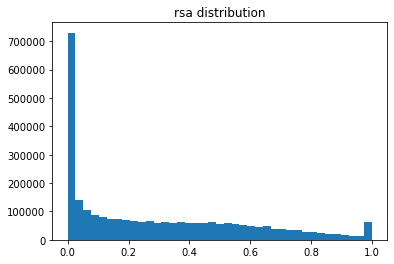

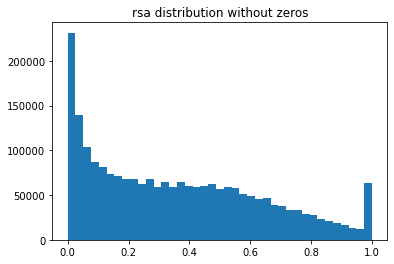

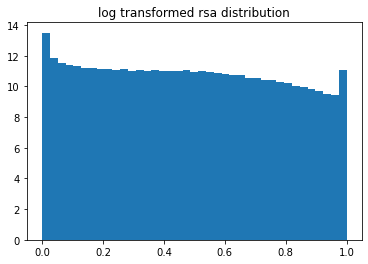

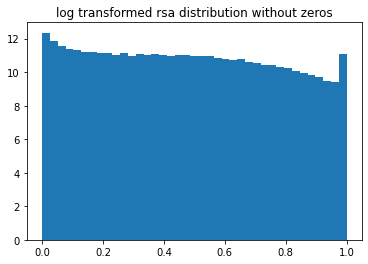

In [60]:
rsa_bins = np.linspace(0, 1, 40)
rsa_counts = np.zeros(39)
rsa_counts_nozero = np.zeros(39)
for idx in range(file['identifiers'].shape[0]):
    seq_length = len(file['sequences'].asstr()[idx])
    rsa = file['labels']['rsa'][idx, :seq_length]
    rsa_counts = rsa_counts + np.histogram(rsa, rsa_bins)[0]
    rsa_counts_nozero = rsa_counts_nozero + np.histogram(rsa[rsa != 0], rsa_bins)[0]

rsa_positive_weight = rsa_counts.sum()/(2*(rsa_counts.sum()-(rsa_counts[0]-rsa_counts_nozero[0])))
print(rsa_positive_weight)

plt.bar(rsa_bins[:-1], rsa_counts, width=1/39, align='edge')
plt.title("rsa distribution")
plt.show()
plt.bar(rsa_bins[:-1], rsa_counts_nozero, width=1/39, align='edge')
plt.title("rsa distribution without zeros")
plt.show()
plt.bar(rsa_bins[:-1], np.log(rsa_counts), width=1/39, align='edge')
plt.title("log transformed rsa distribution")
plt.show()
plt.bar(rsa_bins[:-1], np.log(rsa_counts_nozero), width=1/39, align='edge')
plt.title("log transformed rsa distribution without zeros")
plt.show()